# Načtení dat

In [1]:
import pandas as pd
import os

HOUSING_PATH = os.path.join("datasets", "02", "housing.csv")

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv(housing_path)

In [3]:
housing = load_housing_data()

# Prozkoumání dat

**Metoda head**

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Metoda info**

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


`total_bedrooms` má chybějící hodnoty, s čímž si musíme později poradit

všechny atributy jsou číselné s výjimkou `ocean_proximity`, který je obecně objekt, konkrétně text

**Prozkoumáme kategoriální atributy**

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Prozkoumáme číselné atributy**

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`std` - směrodatná odchylka σ (pokud má atribut normální rozdělení, pak lze použít pravidlo, že 68 % hodnot spadá do vzdálenosti 1σ, 95 % do vzdálenosti 2σ a 99,7 % hodnot do vzdálenosti 3σ od průměru)  

`25%`, `50%`, `75%` - 1. kvartil, medián, 3. kvartil

**Vizualizovat číselné atributy můžeme pomocí histogramů**

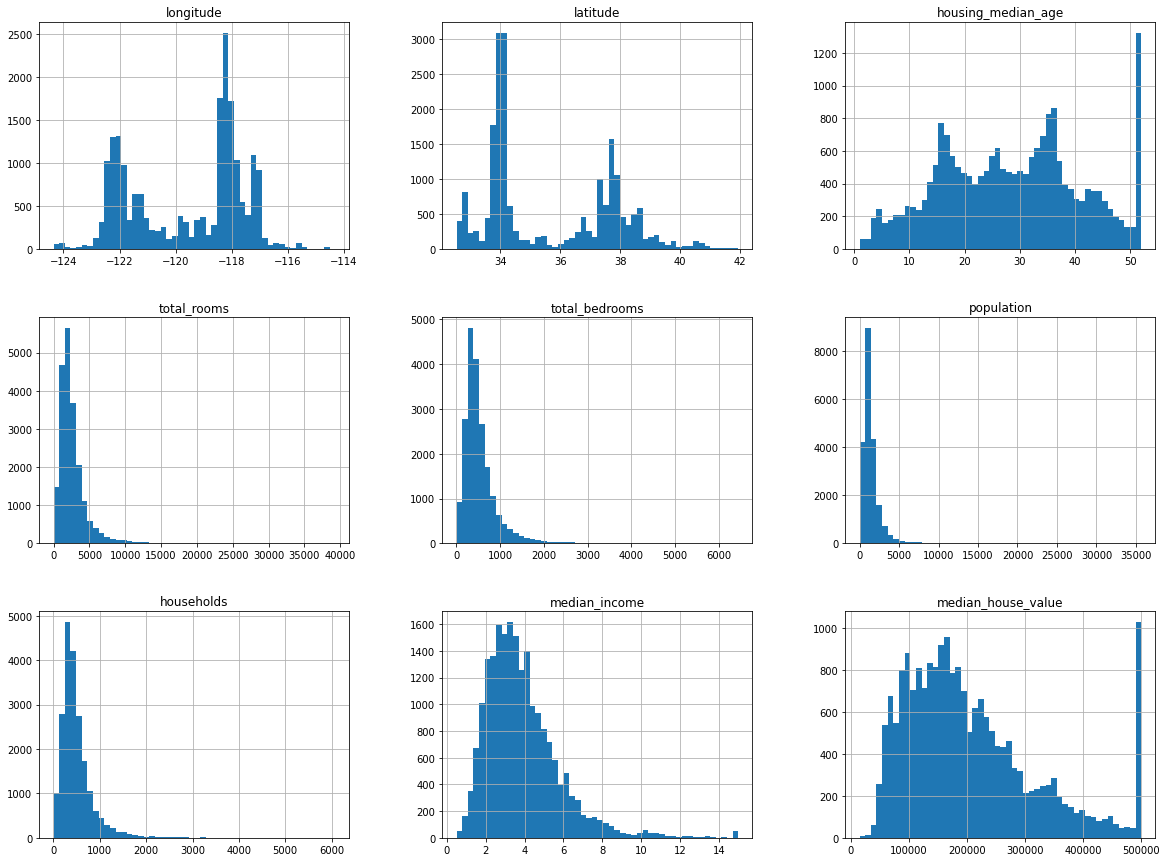

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

`median_income` - zjevně je škálovaný, `příjem = median_income * 10000 USD`


`housing_median_age` a `median_house_value` jsou omezeny horní hranicí

v případě `median_house_value` to může být celkem problém, protože ML algoritmus se pak může naučit, že ceny nikdy nejdou přes tuto hodnotu 

pokud bychom chtěli dokázat správně predikovat ceny nad 500k, pak bychom měli buď:
- získat správné cílové hodnoty pro okrsky, které jsou takto omezeny, nebo:
- odstranit tyto okrsky z datasetu (jak trénovacího, tak testovacího)

atributy mají velmi různé škály, což může být pro některé algoritmy problém 

některé atributy jsou dle histogramů tail-heavy (dlouhý ocas) - od mediánu jdou mnohem dále doprava 


Volitelně tedy můžeme z datasetu odstranit řádky s omezenou house value a housing age

In [9]:
ixs_to_drop = housing[housing["median_house_value"] > 500000].index
housing.drop(ixs_to_drop, inplace=True)

In [10]:
ixs_to_drop = housing[housing["housing_median_age"] >= 52].index
housing.drop(ixs_to_drop, inplace=True)

Ještě musíme přečíslovat index, jinak by tam byly chybějící řádky

In [11]:
housing.reset_index(drop=True, inplace=True)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18572 entries, 0 to 18571
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18572 non-null  float64
 1   latitude            18572 non-null  float64
 2   housing_median_age  18572 non-null  float64
 3   total_rooms         18572 non-null  float64
 4   total_bedrooms      18379 non-null  float64
 5   population          18572 non-null  float64
 6   households          18572 non-null  float64
 7   median_income       18572 non-null  float64
 8   median_house_value  18572 non-null  float64
 9   ocean_proximity     18572 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


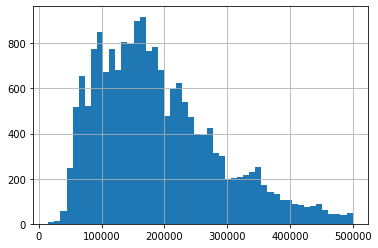

In [13]:
housing["median_house_value"].hist(bins=50)
plt.show()

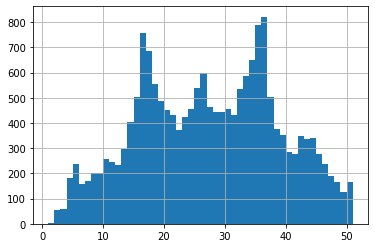

In [14]:
housing["housing_median_age"].hist(bins=50)
plt.show()

### Než budeme pokračovat v prozkoumávání dat, dáme bokem testovací data

Testovací data potřebujeme oddělit náhodně, ale tak, aby při každém spuštění skriptu byl výsledek stejný. Jinak se nám postupně testovací data protočí i v trénovacích datech


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

https://cs.wikipedia.org/wiki/42_(%C4%8D%C3%ADslo)

Pokud máme malý dataset, mohlo by se stát, že při náhodném výběru nebude rozdělení na train_set a test_set reprezentativní (`sampling bias`). Pokud chceme zajistit tzv. stratifikovaný výběr (rozložení na homogenní dílčí podsoubory podle určitého kritéria), můžeme využít třídu `StratifiedShuffleSplit`

K tomu ale potřebujeme zvolit kritérium, které má být zastoupeno stejně v train a test setu a vytvořit podle něj kategorie. Zde zkusíme zvolit `median_income`, jakožto patrně důležitý prediktor. 

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

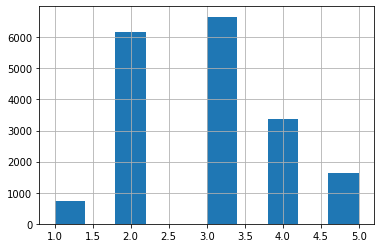

In [17]:
housing["income_cat"].hist()

Provedeme stratifikovaný výběr

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Zkusíme porovnat náhodný a stratifikovaný výběr vs. původní dataset

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.358546
2    0.331898
4    0.181696
5    0.088291
1    0.039569
Name: income_cat, dtype: float64

In [20]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set["income_cat"].value_counts() / len(test_set)

3    0.356393
2    0.335128
4    0.179004
5    0.089637
1    0.039838
Name: income_cat, dtype: float64

In [21]:
housing["income_cat"].value_counts() / len(housing)

3    0.358604
2    0.331844
4    0.181617
5    0.088359
1    0.039576
Name: income_cat, dtype: float64

Než budeme pokračovat, odstraníme z datasetu uměle vytvořenou `income_cat`

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Zkusíme detailně prozkoumat atributy a vztahy mezi nimi

Testovací dataset už máme bokem a budeme podrobněji prozkoumávat trénovací set. Uděláme si kopii, abychom nemodifikovali původní data.

In [23]:
housing = strat_train_set.copy()

**Vizualizace geografických dat** 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

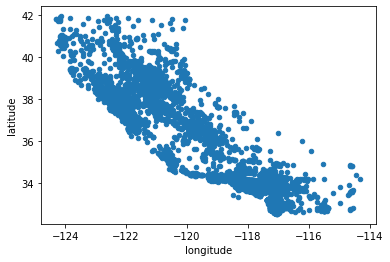

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Máme hodně bodů, které se překrývají, takže budeme chytřejší, pokud nastavíme průhlednost

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

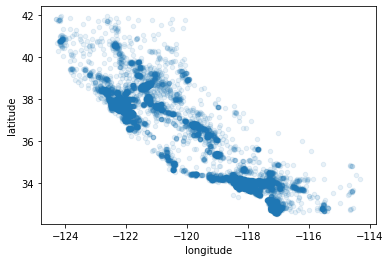

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Můžeme si dokonce nechat zobrazit heat mapu podle cen a velikosti okrsků

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

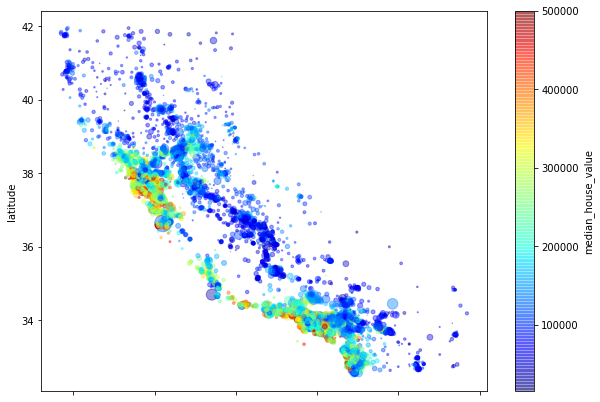

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, c="median_house_value", 
             cmap=plt.get_cmap("jet"), figsize=(10,7))

**Prozkoumání korelací**

Dataset je celkem malý, takže si můžeme dovolit korelace spočítat. Zajímá nás zejména, jak je který atribut korelovaný s cenou nemovitosti

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.663135
total_rooms           0.151353
households            0.095126
total_bedrooms        0.073853
housing_median_age    0.017499
population            0.013621
longitude            -0.022043
latitude             -0.171698
Name: median_house_value, dtype: float64

Více ke korelacím viz prezentace.

Zkusíme podrobněji prozkoumat korelace mezi slibnými atributy

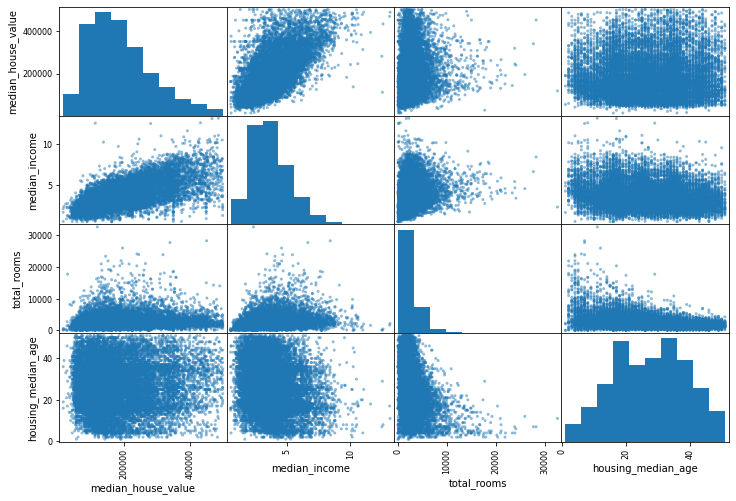

In [28]:
from pandas.plotting import scatter_matrix

attribs = ["median_house_value", "median_income", "total_rooms", 
           "housing_median_age"]

scatter_matrix(housing[attribs], figsize=(12,8))
plt.show()

**Proč to celé děláme:** snažíme se získat ponětí o datech a odstranit případné problémy v nich, které by mohly mít vliv na výsledný model
    

**Poslední věc, než přistoupíme k dalšímu kroku: zkusíme prozkoumat různé kombinace atributů**

Atributy jako `total_rooms`, `total_bedrooms` nebo `population` samy o sobě nemají moc velkou vypovídací hodnotu, protože jsou za celý okrsek. Zkusíme je tedy převést na poměrové ukazatele.  

In [29]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

Znovu se zkusíme podívat na korelace

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.663135
total_rooms                 0.151353
rooms_per_household         0.115246
households                  0.095126
total_bedrooms              0.073853
housing_median_age          0.017499
population                  0.013621
population_per_household   -0.019132
longitude                  -0.022043
latitude                   -0.171698
bedrooms_per_room          -0.230624
Name: median_house_value, dtype: float64

# Příprava dat pro algoritmus strojového učení

Vrátíme se zpátky k čistému train setu. Příznaky a labely si rozdělíme do dvou proměnných (labely nemůžeme mít jako součást příznaků). 

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Chybějící hodnoty

Atribut `total_bedrooms` má u některých příkladů chybějící hodnotu. Můžeme úplně atribut odstranit, můžeme odstranit příklady s chybějící hodnotou nebo můžeme doplnit např. mediánovou hodnotu (což na ukázku uděláme).
Kdybychom chtěli odstranit okrsky s chybějící hodnotou, pak by to šlo takto:
```
housing.dropna(subset=["total_bedrooms"])
```

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [33]:
housing_num = housing.select_dtypes(include=[np.number])

In [34]:
X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [35]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 16506 to 12292
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14857 non-null  float64
 1   latitude            14857 non-null  float64
 2   housing_median_age  14857 non-null  float64
 3   total_rooms         14857 non-null  float64
 4   total_bedrooms      14857 non-null  float64
 5   population          14857 non-null  float64
 6   households          14857 non-null  float64
 7   median_income       14857 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


### Textové a kategoriální atributy

In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].value_counts()

<1H OCEAN     6669
INLAND        5058
NEAR OCEAN    1863
NEAR BAY      1265
ISLAND           2
Name: ocean_proximity, dtype: int64

Algoritmy ML obecně pracují s číselnými atributy a textové atributy napřímo zpracovat nedokáží. Potřebujeme tedy převést text na čísla nebo vektory. 

Více viz prezentace.


In [37]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_onehot = onehot_encoder.fit_transform(housing_cat)

In [38]:
housing_cat_onehot

<14857x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14857 stored elements in Compressed Sparse Row format>

In [39]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Vlastní transformery

Např. přidání nových atributů vzniklých jako kombinace stávajících lze řešit elegantněji tak, aby s nimi šlo pracovat v tzv. `pipeline` a aby se díky tomu daly jednodušeji - automatizovaně - ladit hyperparametry

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        

        
        
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [41]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Normalizace a standardizace příznaků

Většina algoritmů ML nefunguje dobře, pokud číselné příznaky mají velmi rozdílné rozsahy hodnot. 

Více viz prezentace.

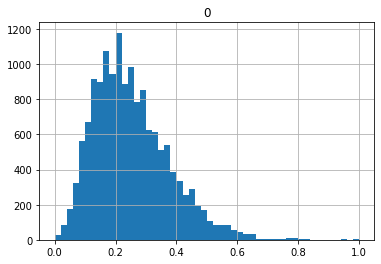

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(housing[["median_income"]])
pd.DataFrame(minmax_data).hist(bins=50)
plt.show()

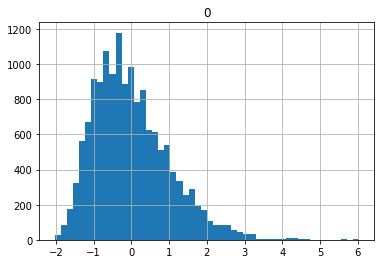

In [43]:
standard_scaler = StandardScaler()
standard_data = standard_scaler.fit_transform(housing[["median_income"]])
pd.DataFrame(standard_data).hist(bins=50)
plt.show()

### Pipelines

Transformace dat lze řešit velmi elegatně pomocí tzv. `Pipeline`. Pomocí ní si přichystáme celý postup zpracování dat pro algoritmus ML.

In [44]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

Ještě musíme nachystat Pipeline pro kategoriální atributy

In [45]:
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

A spojíme to celé dohromady do jedné společné pipeline pomocí `ColumnTransformer`

In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [47]:
housing_prepared

array([[-0.95108287,  0.68256714, -0.17754381, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55594079, -0.67815711, -0.70341469, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30508172,  0.84566764, -0.08989866, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.19888207,  0.7990675 , -0.26518896, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92579724,  1.10196844,  1.66300429, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10716757, -0.67815711,  1.04948826, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
housing_prepared.shape

(14857, 16)

# Výběr a trénování modelu

Nyní již máme vše nachystané pro to, abychom se mohli zaměřit na výběr modelu a jeho trénování

### Vyzkoušíme pro začátek lineární regresi

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Můžeme se podívat na predikce několika hodnot

In [50]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print(lin_reg.predict(some_data_prepared))
print(list(some_labels))

[170569.86059725 306114.48853843 276525.19418875 286041.28212857
 292938.93266027]
[340900.0, 309200.0, 322300.0, 394400.0, 339500.0]


Zjistíme RMSE na trénovacím datasetu

In [51]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

58146.16766924105

Vzhledem k tomu, že většina cílových hodnot leží v intervalu 120000 - 265000, tak typická chyba predikce ve výši 58146 není příliš dobrá. Patrně je tento model málo výkonný pro daný problém a ukazuje se zde underfitting.  

### Nyní vyzkoušíme rozhodovací stromy

Výkonný model, který je schopen nalézt komplexní nelineární vztahy

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Ověříme ho na trénovacích datech

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

Chyba 0.0 zjevně ukazuje naopak na přeučení (overfitting). Abychom si byli jisti a měli jsme reálnou představu, jak model funguje, musíme ho ověřit na validačních a/nebo testovacích datech.

### Ověření provedeme lépe pomocí K-násobné křížové validace

K-fold cross-validation, zde použijeme 5 "hromádek"

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared,housing_labels, 
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
tree_rmse_scores.mean()

64143.59882437337

Chyba 64143 vypadá už mnohem hůře než 0. Dokonce i hůře, než byla chyba linreg na trénovacím datasetu. Pro jistotu ověříme linreg stejným způsobem

In [56]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores.mean()

58496.176882424916

A je to skutečně tak. Model rozhodovacího stromu je natolik přeučen, že poskytuje horší výsledek než linreg.

### Vyzkoušíme ještě Random Forest regresor

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, verbose=2)
forest_reg.fit(housing_prepared, housing_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.8s finished


RandomForestRegressor(random_state=42, verbose=2)

In [58]:
scores = cross_val_score(forest_reg, housing_prepared,housing_labels, 
                         scoring="neg_mean_squared_error", cv=5, verbose=1)
forest_rmse_scores = np.sqrt(-scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.5s finished


In [59]:
forest_rmse_scores.mean()

45454.32458259661

Chyba 45454 je výrazně lepší než v případě lineární regrese nebo rozhodovacího stromu. Tento model tedy vypadá velmi slibně a můžeme se pustit do ladění hyperparametrů.

# Vyladění modelu

Můžeme zkoušet ladit hyperparametry ručně, nebo můžeme použít některý z nástrojů - `Grid Search`, `Randomized Search`

### Grid Search

Řekneme, jaké hodnoty jednotlivých hyperparametrů se mají vyzkoušet, a GridSearch ověří všechny možné kombinace a jejich výsledky

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [61]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.4s
[CV] END ....................max_features=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

Nejlepší nalezená kombinace:

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
np.sqrt(-grid_search.best_score_)

45009.90211348844

Podrobněji:

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

57926.38797426945 {'max_features': 2, 'n_estimators': 3}
50011.0948255442 {'max_features': 2, 'n_estimators': 10}
48023.36036102081 {'max_features': 2, 'n_estimators': 30}
54554.04040754787 {'max_features': 4, 'n_estimators': 3}
47763.3412579128 {'max_features': 4, 'n_estimators': 10}
45725.91782195142 {'max_features': 4, 'n_estimators': 30}
52391.137104267546 {'max_features': 6, 'n_estimators': 3}
46662.23331078837 {'max_features': 6, 'n_estimators': 10}
45009.90211348844 {'max_features': 6, 'n_estimators': 30}
52733.7921624371 {'max_features': 8, 'n_estimators': 3}
47246.104374858376 {'max_features': 8, 'n_estimators': 10}
45232.99140832521 {'max_features': 8, 'n_estimators': 30}
56416.7507959902 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
48772.79364646933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
53217.47685972674 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
47471.33563830557 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


Vidíme, že chybu se podařilo zmenšit na 45009. Nejlepší regresor získáme pomocí
```
grid_search.best_estimator_
```

### Randomized Search

Pokud je prostor hyperparametrů k prohledání příliš velký, může být lepší použít `RandomizedSearchCV`, který volí náhodné hodnoty hyperparametrů ze zadaného rozsahu

Výhodou je, že můžeme zadat, kolik iterací hledání se má provést a lépe tak kontrolovat výpočetní čas. 

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=42, verbose=2)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................max_features=7, n_estimators=180; total time=   7.0s
[CV] END ...................max_features=7, n_estimators=180; total time=   6.9s
[CV] END ...................max_features=7, n_estimators=180; total time=   6.9s
[CV] END ...................max_features=7, n_estimators=180; total time=   6.8s
[CV] END ...................max_features=7, n_estimators=180; total time=   7.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.3s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.4s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.3s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.3s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.4s
[CV] END ....................max_features=3, n_estimators=72; total time=   1.4s
[CV] END ....................max_features=3, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016BC429CEB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016BB5AFD1F0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Opět se podíváme na nejlepší regresor

In [66]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [67]:
np.sqrt(-rnd_search.best_score_)

44442.70952709507

Vidíme, že jsme opět dokázali chybu o něco zlepšit, nyní jsme na hodnotě 44442.

Pokud bychom chtěli zkoušet různé parametry pipeline z hlediska předzpracování dat, tak musíme udělat pipeline ze všech přípravných kroků a nakonec dát regressor a to celé vložit do GridSearchCV, pak lze pomocí kateogrie__parametr měnit hodnoty i mimo samotný regresor.

### Analýza nejlepších modelů

Můžeme si například nechat ukázat, jaké příznaky jsou pro výsledný model důležité

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]["onehot"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.304039511425671, 'median_income'),
 (0.1379164823540521, 'INLAND'),
 (0.10656861734591364, 'population_per_household'),
 (0.09251988633376025, 'bedrooms_per_room'),
 (0.08219912153712185, 'longitude'),
 (0.07167024222969533, 'latitude'),
 (0.037894312166732266, 'rooms_per_household'),
 (0.037858309788711166, 'housing_median_age'),
 (0.03061070999365243, '<1H OCEAN'),
 (0.02010955740933516, 'total_rooms'),
 (0.018889431798136548, 'total_bedrooms'),
 (0.018568771136050884, 'population'),
 (0.018479332218179358, 'households'),
 (0.01638760734083701, 'NEAR OCEAN'),
 (0.006036942475395271, 'NEAR BAY'),
 (0.0002511644467557674, 'ISLAND')]

Na základě této informace můžeme některé z příznaků přestat používat.

# Ověření systému na testovacím datasetu

In [69]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [70]:
final_rmse

43156.58480724707

**Vidíme, že na testovacím datasetu je výsledná chyba 43156. Tato hodnota lze tedy použít jako odhad chyby, které se budeme dopouštět na nových datech.**

Můžeme spočítat i intervaly spolehlivosti, abychom měli lepší představu o očekávatelné chybě.

Podle výsledků na test setu už hyperparametry neladíme, pro produkci bychom si tím s nejvyšší pravděpodobností nepomohli.


# Spuštění, monitorování a údržba systému

Viz prezentace